<a href="https://colab.research.google.com/github/Alejandro-RL/Atividade_2.2/blob/main/Parte%203/PP2_2_3_Validac%CC%A7a%CC%83o_Cruzada_e_Busca_em_Grade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



* Adan Thierry Souza dos Santos - 1915080050
* Alejandro da Rocha Loureiro - 1915080001
* Fernando Araújo Alves Filho - 1915080063
* Victor Brasil de Pina - 1915080079



# Redes Neurais Artificiais 2021.1

- **Disciplina**: Redes Neurais Artificiais 2021.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta parte do Projeto Prático diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Busca em Grade

Uma maneira padrão de escolher os parâmetros de um modelo de Machine Learning é por meio de uma busca em grade via força bruta. O algoritmo da busca em grade é dado como segue:

1. Escolha a métrica de desempenho que você deseja maximizar  
2. Escolha o algoritmo de Machine Learning (exemplo: redes neurais artificiais). Em seguida, defina os parâmetros ou hiperparâmetros deste tipo de modelo sobre os quais você deseja otimizar (número de épocas, taxa de aprendizado, etc.) e construa um array de valores a serem testados para cada parâmetro ou hiperparâmetro.  
3. Defina a grade de busca, a qual é dada como o produto cartesiano de cada parâmetro a ser testado. Por exemplo, para os arrays [50, 100, 1000] e [10, 15], tem-se que a grade é [(50,10), (50,15), (100,10), (100,15), (1000,10), (1000,15)].
4. Para cada combinação de parâmetros a serem otimizados, utilize o conjunto de treinamento para realizar uma validação cruzada (holdout ou k-fold) e calcule a métrica de avaliação no conjunto de teste (ou conjuntos de teste)
5. Escolha a combinação de parâmetros que maximizam a métrica de avaliação. Este é o modelo otimizado.

Por que esta abordagem funciona? Porque a busca em grade efetua uma pesquisa extensiva sobre as possíveis combinações de valores para cada um dos parâmetros a serem ajustados. Para cada combinação, ela estima a performance do modelo em dados novos. Por fim, o modelo com melhor métrica de desempenho é escolhido. Tem-se então que este modelo é o que melhor pode vir a generalizar mediante dados nunca antes vistos.

## Efetuando a Busca em Grade sobre Hiperparâmetros das Top-6 RNAs

Considerando a etapa anterior do projeto prático, foram identificadas pelo menos 6 melhores Redes Neurais para o problema da classificação multi-classe da cobertura florestal no conjunto de dados selecionado. Algumas destas redes possuem atributos categóricos como variáveis preditoras, enquanto outras possuem apenas os atributos numéricos como preditores.

A primeira etapa desta segunda parte do projeto consiste em trazer para este notebook estas seis arquiteturas, ressaltando:

1. Número de neurônios ocultos por camada  
2. Função de Ativação  
3. Utilização ou não de atributos categóricos   
4. Desempenho médio +- desvio padrão nos testes anteriores  
5. Número de repetições que a equipe conseguiu realizar para verificar os resultados  

Elabore uma busca em grade sobre estas arquiteturas que contemple variações nos hiperparâmetros a seguir, conforme documentação de [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

A. Solver  (Não usar o LBFGS, pois é mais adequado para datasets pequenos)  
B. Batch Size  
C. Learning Rate Init  
D. Paciência (n_iter_no_change)  
E. Épocas  

Nesta busca em grande, contemple a utilização do objeto [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, balanced_accuracy_score,f1_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV  
from joblib import dump, load

In [ ]:
!wget https://www.dropbox.com/s/2j9euhvkl1njfzh/covtype.csv

In [4]:
def validation(rede, X_test_std,y_test, p = True):
  y_pred = rede.predict(X_test_std)
  cmatrix = confusion_matrix(y_test,y_pred)
  
  #6.2 Acurácia
  acc = balanced_accuracy_score(y_test,y_pred,adjusted=False)
  

  #6.4 Precisão
  pre = precision_score(y_test,y_pred,average='weighted')
  

  #6.5 Revocação 
  rev = recall_score(y_test,y_pred,average='weighted')
  

  #6.3 F-Score
  f1 = f1_score(y_test,y_pred,average='weighted')
  

  if (p):
    print("Matriz de confusão:\n")
    print(cmatrix)
    print("\nAcurácia: ",acc)
    print("\nPrecisão: ",pre)
    print("\nRevocação: ",rev)
    print("\nF-Score: ",f1)
  return cmatrix, acc, pre, rev, f1

In [5]:
df = pd.read_csv('/content/covtype.csv')

In [ ]:
X = df[df.columns[0:10]]
y = df[df.columns[-1]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7,random_state=42, shuffle=True)

In [ ]:
X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

In [ ]:
#Melhores  6 Redes do Trabalho Anterior, por 15 Repetições
#Conseguimos melhores resultados sem os atributos categóricos
redes = [[] for i in range(6)] 
redes[0] = MLPClassifier(hidden_layer_sizes=(30,40),activation='logistic',max_iter=200,solver="adam")
redes[1] = MLPClassifier(hidden_layer_sizes=(10,15),activation='tanh',max_iter=200,solver="adam")
redes[2] = MLPClassifier(hidden_layer_sizes=(10,15),activation='relu',max_iter=150,solver="adam")
redes[3] = MLPClassifier(hidden_layer_sizes=(25,25),activation='tanh',max_iter=200,solver="adam")
redes[4] = MLPClassifier(hidden_layer_sizes=(25,25),activation='tanh',max_iter=100,solver="adam")
redes[5] = MLPClassifier(hidden_layer_sizes=(25,25),activation='relu',max_iter=100,solver="adam")

In [ ]:
'''

Rede de índice:  0
Acurácia Média:  0.6625432510864768
F-Score Médio:   0.8036498803809674

Rede de índice:  1
Acurácia Média:  0.5381018340996561
F-Score Médio:   0.7439390815931607

Rede de índice:  2
Acurácia Média:  0.5429059643905464
F-Score Médio:   0.7346680900384723

Rede de índice:  3
Acurácia Média:  0.6442603044172408
F-Score Médio:   0.7942627494389778

Rede de índice:  4
Acurácia Média:  0.6311301344393269
F-Score Médio:   0.7901136926854332

Rede de índice:  5
Acurácia Média:  0.6233769019863493
F-Score Médio:   0.7740351681237906
'''

In [ ]:
'''
Hiperparâmetros
A. Solver - ‘sgd’, ‘adam’
B. Batch Size -  inteiro (default = batch_size=min(200, n_samples))
C. Learning Rate Init - float (default=0.001)
D. Paciência (n_iter_no_change) - inteiro (default=10)
E. Épocas (max_iter) - inteiro (default=200)
'''

In [ ]:
#2 possibilidades para os 5 parâmetros = 32 combinações possíveis
parameters = {'solver':['sgd','adam'],'batch_size':[300,600],
              'learning_rate_init':[0.0001,0.01],'n_iter_no_change':[5,25],
              'max_iter':[100,300]}

## Validação Cruzada k-fold

Na elaboração da busca em grid, vamos avaliar os modelos propostos segundo uma estratégia de validação cruzada ainda não explorada até o momento: a validação cruzada k-fold. Segundo a mesma, o conjunto de dados é particionado em k partes: a cada iteração, separa-se uma das partes para teste e o modelo é treinado com as k-1 partes remanescentes. Valores sugestivos de k na literatura são k = 3, 5 ou 10, pois o custo computacional desta validação dos modelos é alto. A métrica de desempenho é resultante da média dos desempenhos nas k iterações. A figura a seguir ilustra a ideia desta avaliação

<img src = "https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png" width=600></img>

Considerando a métrica de desempenho F1-Score, considere a validação cruzada 5-fold para aferir os resultados da busca em grande anterior.

In [ ]:
grids = [[] for i in range(6)]
for i in range(len(redes)):
  grids[i] = GridSearchCV(redes[i],parameters,n_jobs=-1,scoring='f1_weighted',cv=5)
  grids[i].fit(X_train_std,y_train)

In [ ]:
f1_cv = [[] for i in range(6)]
for i in range(len(grids)):
  print('Rede de índice: ',i)
  print("Melhores parâmetros: ",grids[i].best_params_)
  print("F1 usando os melhores parâmetros",grids[i].score(X_train_std,y_train))
  f1_cv[i] = grids[i].score(X_train_std,y_train)
  print()


In [ ]:
'''
Rede de índice:  0
Melhores parâmetros:  {'batch_size': 300, 'learning_rate_init': 0.0001, 'max_iter': 200, 'n_iter_no_change': 25, 'solver': 'sgd'}
F1 usando os melhores parâmetros 0.6635554990136535

Rede de índice:  1
Melhores parâmetros:  {'batch_size': 600, 'learning_rate_init': 0.0001, 'max_iter': 200, 'n_iter_no_change': 5, 'solver': 'sgd'}
F1 usando os melhores parâmetros 0.6907165370474745

Rede de índice:  2
Melhores parâmetros:  {'batch_size': 600, 'learning_rate_init': 0.0001, 'max_iter': 100, 'n_iter_no_change': 25, 'solver': 'sgd'}
F1 usando os melhores parâmetros 0.6834930197473567

Rede de índice:  3
Melhores parâmetros:  {'batch_size': 600, 'learning_rate_init': 0.0001, 'max_iter': 100, 'n_iter_no_change': 5, 'solver': 'sgd'}
F1 usando os melhores parâmetros 0.6876427439277757

Rede de índice:  4
Melhores parâmetros:  {'batch_size': 600, 'learning_rate_init': 0.0001, 'max_iter': 100, 'n_iter_no_change': 5, 'solver': 'sgd'}
F1 usando os melhores parâmetros 0.6850062556358316

Rede de índice:  5
Melhores parâmetros:  {'batch_size': 600, 'learning_rate_init': 0.0001, 'max_iter': 100, 'n_iter_no_change': 5, 'solver': 'sgd'}
F1 usando os melhores parâmetros 0.6904123726750625
'''

In [15]:
f1 = [0.8036498803809674, 0.7439390815931607,0.7346680900384723,0.7942627494389778,0.7901136926854332,0.7740351681237906]
f1_cv = [0.6635554990136535, 0.6907165370474745, 0.6834930197473567, 0.6876427439277757, 0.6850062556358316, 0.6904123726750625]

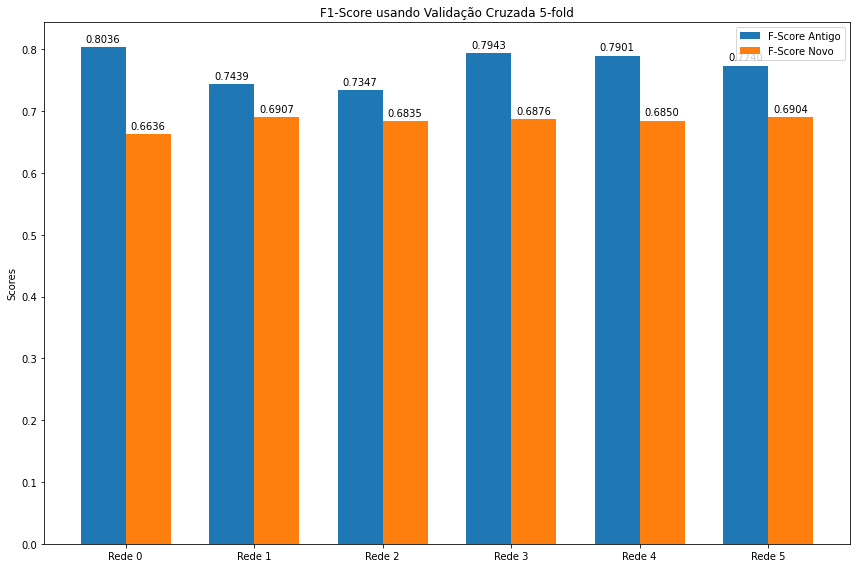

In [17]:
labels = ['Rede 0', 'Rede 1', 'Rede 2', 'Rede 3', 'Rede 4','Rede 5']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width/2, f1, width, label='F-Score Antigo')
rects2 = ax.bar(x + width/2, f1_cv, width, label='F-Score Novo')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('F1-Score usando Validação Cruzada 5-fold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Identificando a mellhor solução

Como resultado da busca em grande com validação cruzada 5-fold, identifique o modelo otimizado com melhor desempenho para o problema. Apresente claramente este modelo, seus parâmetros, hiperparâmetros otimizados e resultados para cada um dos folds avaliados. Esta é a melhor solução identificada em decorrência deste projeto

In [ ]:
max_value = max(f1_cv)
max_index = f1_cv.index(max_value)
print("A rede com o maior F-Score foi a Rede",max_index)
print("Com F-Score de: ",max_value)

In [ ]:
'''
A rede com o maior F-Score foi a Rede 1
Com F-Score de:  0.6907165370474745
'''

In [ ]:
print("Os parâmetros usados para chegar nesse resultado:")
print("Parâmetros da rede em sí: ",grids[max_index].estimator)
print("Melhor combinação de parâmetros encontrados na busca em grade: ", grids[max_index].best_params_)

In [ ]:
'''
Os parâmetros usados para chegar nesse resultado:
Parâmetros da rede em sí:  MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 15))
Melhor combinação de parâmetros encontrados na busca em grade:  {'batch_size': 600, 'learning_rate_init': 0.0001, 'max_iter': 200, 'n_iter_no_change': 5, 'solver': 'sgd'}
'''

In [ ]:
results = pd.DataFrame(grids[max_index].cv_results_)
results

In [ ]:
'''
    mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0      164.092071      1.142122  ...        0.042126                3
1      179.041425      1.870932  ...        0.039660               15
2      163.799282      1.561437  ...        0.047601                6
3      176.091052      1.924988  ...        0.030970               14
4      329.721640      0.912278  ...        0.036292                8
5      357.391156      2.845103  ...        0.034498               13
6      330.410508      2.026915  ...        0.029186                7
7      355.916706      2.565415  ...        0.032708               19
8      166.207604      1.949273  ...        0.033687               26
9      122.802764     28.713628  ...        0.040885               29
10     168.713264      1.629074  ...        0.043905               24
11     180.806694      0.675436  ...        0.044986               30
12     207.757677     40.385407  ...        0.038334               28
13     114.167213     34.937516  ...        0.037886               25
14     351.750922      2.746539  ...        0.036193               21
15     241.489059     49.557672  ...        0.025116               23
16     135.093087      3.418669  ...        0.063609                2
17     151.871824      2.604901  ...        0.037742                9
18     155.225063      4.127850  ...        0.065919                5
19     175.573456      3.816292  ...        0.034661               10
20     341.793541      4.294307  ...        0.033064                1
21     376.558270      5.491749  ...        0.031096               12
22     354.512182      5.922074  ...        0.047188                4
23     371.050057      1.918571  ...        0.035740               11
24     176.904013      1.651506  ...        0.023218               18
25     111.931286     36.577093  ...        0.042418               32
26     179.237213      4.060711  ...        0.046263               22
27     188.000106      2.894614  ...        0.039389               17
28     272.981399     18.481534  ...        0.018559               20
29     121.545226     32.039206  ...        0.035800               16
30     235.768835      6.917839  ...        0.037800               27
31     184.477042     24.640387  ...        0.043478               31
'''

## Empacotando a solução

Suponha que você deve entregar este classificador ao órgão responsável por administrar o Roosevelt National Park. Para tanto, você deve fazer uma preparação do mesmo para utilização neste cenário. Uma vez que já identificou os melhores parâmetros e hiperparâmetros, o passo remanescente consiste em treinar o modelo com estes valores e todos os dados disponíveis, salvando o conjunto de pesos do modelo ao final para entrega ao cliente. Assim, finalize o projeto prático realizando tais passos.

1. Consulte a documentação a seguir:
https://scikit-learn.org/stable/modules/model_persistence.html  
2. Treine o modelo com todos os dados  
3. Salve o modelo em disco  
4. Construa uma rotina que recupere o modelo em disco  
5. Mostre que a rotina é funcional, fazendo previsões com todos os elementos do dataset e exibindo uma matriz de confusão das mesmas

In [6]:
#2
#Pegando todos os dados
X = df[df.columns[0:54]]
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7,shuffle=True,random_state=42)
X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)


In [ ]:

#Colocando os melhores parâmetros na rede
melhores_params = grids[max_index].best_params_
melhor_rede = redes[max_index]
melhor_rede.set_params(**melhores_params)

#Treinando 
melhor_rede.fit(X_train_std,y_train)

In [ ]:
#3
dump(melhor_rede, 'melhor_rede.joblib') 

In [ ]:
!wget https://www.dropbox.com/s/4qduuy4iv3u92lr/melhor_rede.joblib

In [ ]:
#4
melhor_rede1 = load('melhor_rede.joblib') 

In [10]:
#5
validation(melhor_rede1,X_test_std, y_test)
!

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Matriz de confusão:

[[45619 16812    19     0     0     4  1102]
 [14737 68412  1290     0     3   556    80]
 [    0   866  9371     0    20   381     0]
 [    0     0   746     0     0    49     0]
 [   34  2779   114     0     5     9     0]
 [   14  1223  3114     0    36   840     0]
 [ 2451    50     0     0     0     0  3568]]

Acurácia:  0.4504420248515252

Precisão:  0.7152757992840456

Revocação:  0.7332878189829264

F-Score:  0.7196930561561792
